# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [139]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [140]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [141]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH']) / 365
print(app_train['DAYS_BIRTH'].value_counts())
print(app_train['DAYS_BIRTH'].max())
print(app_train['DAYS_BIRTH'].min())

37.668493    43
36.934247    42
49.994521    41
27.452055    41
28.197260    40
43.208219    40
39.438356    39
39.087671    39
31.956164    39
36.336986    39
40.523288    38
41.210959    38
37.216438    38
37.353425    38
37.775342    38
42.643836    38
36.931507    38
38.057534    38
40.794521    37
35.084932    37
40.520548    37
27.923288    37
27.769863    37
36.210959    37
39.112329    37
30.432877    37
54.997260    37
42.638356    37
27.690411    37
40.457534    37
             ..
68.273973     1
68.419178     1
68.849315     1
21.736986     1
68.539726     1
68.706849     1
68.156164     1
68.975342     1
68.939726     1
68.616438     1
68.726027     1
67.356164     1
68.213699     1
68.109589     1
65.358904     1
69.016438     1
21.909589     1
68.841096     1
66.443836     1
68.164384     1
68.789041     1
68.764384     1
21.619178     1
68.624658     1
66.939726     1
68.416438     1
68.942466     1
21.408219     1
68.808219     1
68.580822     1
Name: DAYS_BIRTH, Length

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [143]:
#受雇日數與還款能力
app_train['YEAS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'] / 365)
app_train['YEAS_EMPLOYED'].head()

0    1.745205
1    3.254795
2    0.616438
3    8.326027
4    8.323288
Name: YEAS_EMPLOYED, dtype: float64

In [144]:
app_train['DAYS_EMPLOYED'].head()

0    -637.0
1   -1188.0
2    -225.0
3   -3039.0
4   -3038.0
Name: DAYS_EMPLOYED, dtype: float64

In [145]:
employed_data = app_train[['TARGET', 'YEAS_EMPLOYED']]
print(employed_data)

        TARGET  YEAS_EMPLOYED
0            1       1.745205
1            0       3.254795
2            0       0.616438
3            0       8.326027
4            0       8.323288
5            0       4.350685
6            0       8.575342
7            0       1.230137
8            0            NaN
9            0       5.531507
10           0       1.860274
11           0            NaN
12           0       7.443836
13           0       8.295890
14           0       0.556164
15           0       3.169863
16           0       3.608219
17           0       0.523288
18           0      21.380822
19           0       5.583562
20           0      11.742466
21           0       4.526027
22           0      11.797260
23           0            NaN
24           0       2.043836
25           0       9.572603
26           1       7.200000
27           0       3.380822
28           0       4.920548
29           0       2.767123
...        ...            ...
307481       1       8.621918
307482    

In [146]:
print("max:", app_train['YEAS_EMPLOYED'].max())
print("min:", app_train['YEAS_EMPLOYED'].min())
app_train['YEAS_EMPLOYED'].value_counts()

max: 49.07397260273972
min: 0.0


0.547945     156
0.613699     152
0.630137     151
0.545205     151
0.580822     150
1.052055     143
0.627397     143
0.632877     140
0.589041     138
0.567123     138
0.515068     137
0.591781     137
0.536986     136
0.317808     136
0.608219     135
0.528767     134
0.534247     133
0.586301     132
0.695890     131
0.583562     131
0.550685     130
1.043836     130
0.506849     128
0.638356     128
0.649315     127
0.531507     127
0.641096     126
0.504110     126
0.572603     125
0.953425     125
            ... 
45.693151      1
32.849315      1
24.295890      1
40.216438      1
35.602740      1
35.509589      1
27.673973      1
17.827397      1
44.789041      1
36.391781      1
27.424658      1
26.427397      1
27.101370      1
37.832877      1
34.635616      1
27.024658      1
31.252055      1
35.652055      1
40.912329      1
29.454795      1
35.213699      1
22.465753      1
42.980822      1
44.832877      1
24.304110      1
29.452055      1
40.408219      1
34.950685     

In [147]:
bin_cut =  np.linspace(0, 50, 11)
employed_data['YEAS_EMPLOYED_BINNED'] = pd.cut(employed_data['YEAS_EMPLOYED'], bins = bin_cut)
print(employed_data['YEAS_EMPLOYED_BINNED'].value_counts())
employed_data.head()

(0.0, 5.0]      136309
(5.0, 10.0]      64872
(10.0, 15.0]     27549
(15.0, 20.0]     10849
(20.0, 25.0]      6243
(25.0, 30.0]      3308
(30.0, 35.0]      1939
(35.0, 40.0]       832
(40.0, 45.0]       210
(45.0, 50.0]        24
Name: YEAS_EMPLOYED_BINNED, dtype: int64


,TARGET,YEAS_EMPLOYED,YEAS_EMPLOYED_BINNED
0,1,1.745205,"(0.0, 5.0]"
1,0,3.254795,"(0.0, 5.0]"
2,0,0.616438,"(0.0, 5.0]"
3,0,8.326027,"(5.0, 10.0]"
4,0,8.323288,"(5.0, 10.0]"


[(0.0, 5.0], (5.0, 10.0], (10.0, 15.0], (15.0, 20.0], (20.0, 25.0], (25.0, 30.0], (30.0, 35.0], (35.0, 40.0], (40.0, 45.0], (45.0, 50.0]]
Categories (10, interval[float64]): [(0.0, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] ... (30.0, 35.0] < (35.0, 40.0] < (40.0, 45.0] < (45.0, 50.0]]


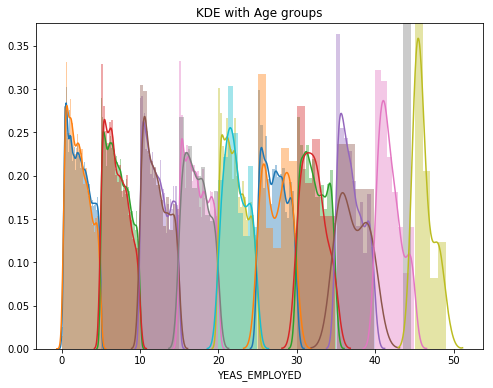

In [161]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = employed_data['YEAS_EMPLOYED_BINNED'].unique().dropna().sort_values()
print(year_group_sorted)

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(employed_data.loc[(employed_data['YEAS_EMPLOYED_BINNED'] == year_group_sorted[i]) & \
                              (employed_data['TARGET'] == 0), 'YEAS_EMPLOYED'], label = str(year_group_sorted[i]))
    
    sns.distplot(employed_data.loc[(employed_data['YEAS_EMPLOYED_BINNED'] == year_group_sorted[i]) & \
                              (employed_data['TARGET'] == 1), 'YEAS_EMPLOYED'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

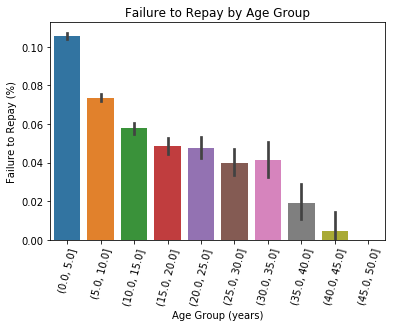

In [162]:
px = employed_data['YEAS_EMPLOYED_BINNED']
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');